# MCT4052 Workshop 1c: Handling Features for ML

author: Stefano Fasciani, stefano.fasciani@imv.uio.no, Department of Musicology, University of Oslo.

Machine learning algorithms expect data with identical dimensionality for all examples. In this notebook we focus on features extracted from audio files, but the same may apply (for features extracted from MIDI files).

If the raw data (audio files) does not have an identical lenght (in samples), the features computed as above may produce vectors of different size (dimensionality). One option is to aggregate the features to a single number taking for example their sum, or their average and optionally more statistical moments (such as variance, skewness, etc.), but in this case we loose the temporal unfolding of information, which can be critical in many application context.

When is not possible to work with files with identical temporal duration, another option (explored in following notebooks) is to force the librosa load function to load an equal-duration segment from all audio files (if this is longer the the file duration, we must manually zero-pad the signal, i.e. zeros will be added at the end of the signal to match the desired duration, for instance usign the librosa.util.fix_length function). Again, choice is reasonable in some application context, while it won't be in others.

Alternativelly we can stretch/compress the computed features to match a pre-determined size. We do this by interpolating data, which creates artifacts. When stretching (i.e. increasing the lenght) we are actually "fabricating" data that does not exist (i.e. do it only if it make sense in the specific application context).

Obviously the right choice is context- and application-specific. In general in a single ML application the audio signal on which we compute the features may vary but only within a reasonable limit (it wont make much sense to compare extremely long and short audio signals).

Moreover, before feeding machine learning with data, we need to pack the different features in the the same 1-D (or row) array (alternatively you can opt for a column array, but in this course we stick to rows).


In [1]:
import numpy as np
import scipy
import librosa, librosa.display
import matplotlib.pyplot as plt
import sklearn

%matplotlib nbagg
%config IPCompleter.greedy=True

### 1. Combining heterogeneous features

(1, 21)
(1, 21)
(42,)


<IPython.core.display.Javascript object>


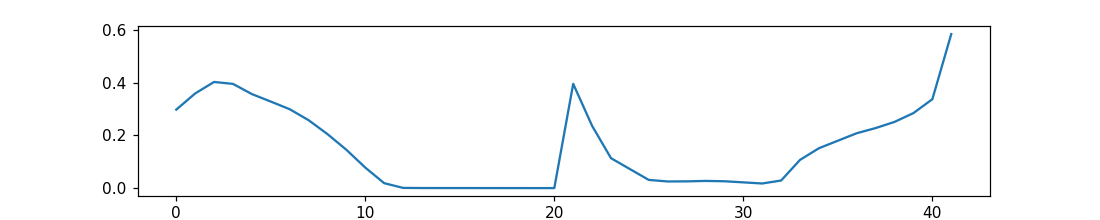

In [9]:
#importing the preprocessing module of scikit-learn
from sklearn import preprocessing

# loading a file, computing three different scalar features and packing these in a single array
sr = 22050
file = './data/examples1/kick.wav'
signal, sr = librosa.load(file, sr=sr, mono=True)
rms = librosa.feature.rms(y=signal)
cent = librosa.feature.spectral_centroid(y=signal)

# normalizing the rms and cent arrays to equalize their ranges the different ranges
rms = sklearn.preprocessing.normalize(rms)
cent = sklearn.preprocessing.normalize(cent)

#appending the computed fectures to a single feature array
feat = np.append(rms,cent)

print(rms.shape)
print(cent.shape)
print(feat.shape)

#plotting
plt.figure(figsize=(10, 2))
plt.plot(feat)


### 2. Files with different lenght

In [11]:
#Change log:
## All positional args to keyword args

# Working with mean and variance of each feature computed over time, to get a more compressed global feature array
sr = 22050
file1 = './data/examples1/kick.wav'
file2 = './data/examples1/openhat.wav'
signal1, sr = librosa.load(file1, sr=sr, mono=True)
signal2, sr = librosa.load(file2, sr=sr, mono=True)
rms1 = librosa.feature.rms(y=signal1)
rms2 = librosa.feature.rms(y=signal2)
cent1 = librosa.feature.spectral_centroid(y=signal1)
cent2 = librosa.feature.spectral_centroid(y=signal2)

# normalizing the rms and cent arrays to equalize their ranges the different ranges
rms1 = sklearn.preprocessing.normalize(rms1)
rms2 = sklearn.preprocessing.normalize(rms2)
cent1 = sklearn.preprocessing.normalize(cent1)
cent2 = sklearn.preprocessing.normalize(cent2)

#appending the computed fectures to a single array
feat1 = np.append(rms1,cent1)
feat2 = np.append(rms2,cent2)

print("")
print(rms1.shape)
print(cent1.shape)
print(feat1.shape)
print("")
print(rms2.shape)
print(cent2.shape)
print(feat2.shape)

#computing mean and variance and storing in a single array (perhaps the mean is succifient, 
# or other than the variance you may add other moments)
feat1 = np.array([np.mean(rms1),np.var(rms1),np.mean(cent1),np.var(cent1)])
feat2 = np.array([np.mean(rms2),np.var(rms2),np.mean(cent2),np.var(cent2)])

# note the different in lenght/size fo the array computed from the two different files
print("")
print(rms1.shape)
print(cent1.shape)
print(feat1.shape)
print("")
print(rms2.shape)
print(cent2.shape)
print(feat2.shape)



(1, 21)
(1, 21)
(42,)

(1, 15)
(1, 15)
(30,)

(1, 21)
(1, 21)
(4,)

(1, 15)
(1, 15)
(4,)


### 3. Equalizing the lenght of the feature array by interpolating

(1, 21)


<IPython.core.display.Javascript object>


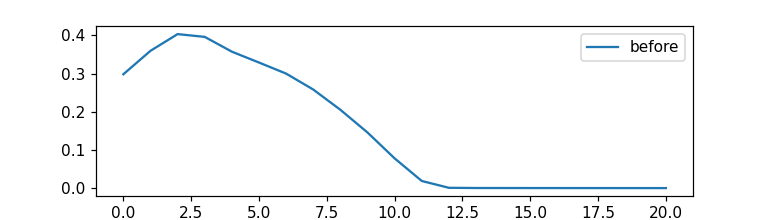

<IPython.core.display.Javascript object>


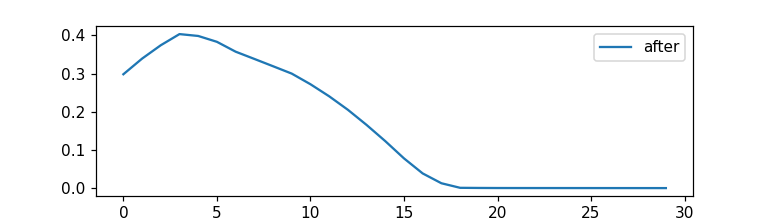

(30,)

(60,)

(60,)


In [14]:
#Change log:
## All positional args to keyword args

#defining function to interpolate 1-D dimensional arrays
def lin_interp_1d(data, out_size):
    
    in_size = data.shape[0]
    x_in = np.arange(0,in_size)
    interpolator = scipy.interpolate.interp1d(x_in, data)
    x_out = np.arange(0,in_size-1,((in_size-1)/out_size))
    output = interpolator(x_out)
    output = output[0:out_size]
    
    return output


# repeating the same on two files with different lenght and exploring different options
sr = 22050
file1 = './data/examples1/kick.wav'
file2 = './data/examples1/openhat.wav'
signal1, sr = librosa.load(file1, sr=sr, mono=True)
signal2, sr = librosa.load(file2, sr=sr, mono=True)
rms1 = librosa.feature.rms(y=signal1)
rms2 = librosa.feature.rms(y=signal2)
cent1 = librosa.feature.spectral_centroid(y=signal1)
cent2 = librosa.feature.spectral_centroid(y=signal2)

#normalizing
rms1 = sklearn.preprocessing.normalize(rms1)
rms2 = sklearn.preprocessing.normalize(rms2)
cent1 = sklearn.preprocessing.normalize(cent1)
cent2 = sklearn.preprocessing.normalize(cent2)

#interpolating to a target size (this won't work on vectorial features, 2D interpolation needed)
print(rms1.shape)
plt.figure(figsize=(7, 2))
plt.plot(rms1.T, label='before')
plt.legend()
rms1 = lin_interp_1d(rms1.flatten(), 30)

plt.figure(figsize=(7, 2))
plt.plot(rms1.T, label='after')
plt.legend()
print(rms1.shape)

rms2 = lin_interp_1d(rms2.flatten(), 30)
cent1 = lin_interp_1d(cent1.flatten(), 30)
cent2 = lin_interp_1d(cent2.flatten(), 30)

#appending the computed fectures to a single array
feat1 = np.append(rms1,cent1)
feat2 = np.append(rms2,cent2)

print("")
print(feat1.shape)
print("")
print(feat2.shape)


### 4. 2D interpolation for vector features computed over time

(128, 1293)
(30, 1293)


<IPython.core.display.Javascript object>


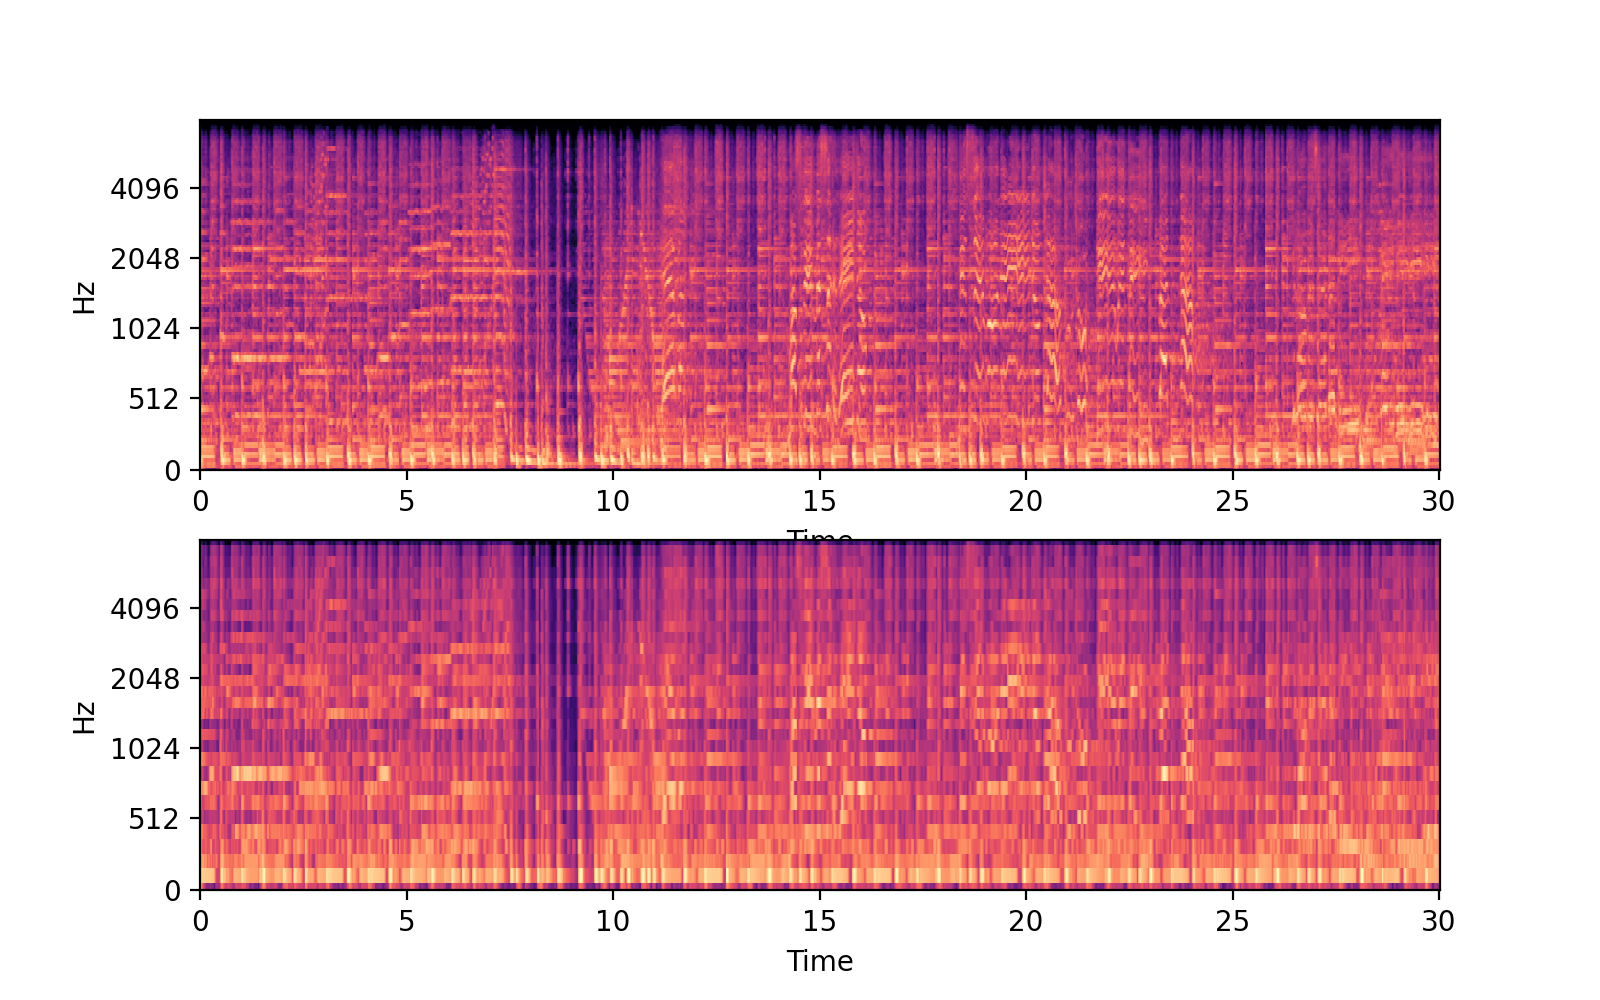

In [5]:
#defining function to interpolate 2-D dimensional arrays
def lin_interp_2d(data, out_size):
    
    x_in_size = data.shape[1]
    y_in_size = data.shape[0]
    x_in = np.arange(0,x_in_size)
    y_in = np.arange(0,y_in_size)
    interpolator = scipy.interpolate.interp2d(x_in, y_in, data, kind='linear')
    x_out = np.arange(0,x_in_size-1,((x_in_size-1)/out_size[1]))
    y_out = np.arange(0,y_in_size-1,((y_in_size-1)/out_size[0]))
    output = interpolator(x_out, y_out)
    output = output[0:out_size[0],0:out_size[1]]
    
    return output

#loading file
sr = 22050
file1 = './data/examples1/disco.wav'
signal, sr = librosa.load(file1, sr=sr, mono=True)

#computing melspectrogram
melspect = librosa.feature.melspectrogram(y=signal)

#interpolating linearly in 2 dimensions to adjust the size of vector features, here we can specify both dimensions
print(melspect.shape)
melspect1 = lin_interp_2d(melspect, (30,1293))
print(melspect1.shape)

plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.power_to_db(melspect,ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(melspect1,ref=np.max), y_axis='mel', fmax=8000, x_axis='time')


### Follow-up Activities

1. Try to handle the different file lengths by merging the features computer over time using mean, variance or standard deviation and [skew](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) 
2. Try to remove sklearn.preprocessing.normalize from the first example, check and explain the difference from Section 1.
3. Change values of target interpolation size to stretch/compress features.
4. Change/expand the type of scalar and vector features in Section 3. and 4.
5. Compute the melspect from kick.wav and openhat.wav and equalize their lenght by using the mean, then try to add the variance as well.
6. Compute the melspect from kick.wav and openhat.wav and equalize their lenght by using lin_interp_2d.